In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Самопроверка (не оценивается)

### 1
Предположим, что X и Y заданы так: $X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]$. 
Постройте модель линейной регрессии. Чему будет равно предсказанное значение зависимой переменной, если значение объясняющей равно 0? Выберите один верный ответ.




In [6]:
X = [3, 2, 98, 34, 11, 2, 3]
y = [2, 1, 0, 3, 7, 2, 15]

res = st.linregress(x=X, y=y)
res.intercept.round(3)

5.499

### 2
Предположим, что X и Y заданы так: $X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]$. На сколько будет увеличиваться предсказанное значение Y при увеличении X на 1? Выберите один верный ответ.

In [10]:
X = [3, 2, 98, 34, 11, 2, 3]
y = [2, 1, 0, 3, 7, 2, 15]

# y_pred = res.slope * X + res.intercept
res = st.linregress(X, y)

res.slope

-0.05549678881752928

### 3
Предположим, что X и Y заданы так: $X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]$. Чему будет равно значение среднеквадратичной ошибки? Выберите один верный ответ.

In [43]:
X = np.array([3, 2, 98, 34, 11, 2, 3])
y = np.array([2, 1, 0, 3, 7, 2, 15])

res = st.linregress(X, y)
y_pred = res.slope * X + res.intercept
mse = (np.square(y - y_pred)).mean()
mse

20.019396621512225

### 4
Предположим, что X и Y заданы так: $X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]$. Чему будет равно значение средней абсолютной ошибки? Выберите один верный ответ.

In [44]:
𝑋 = np.array([3,2,98,34,11,2,3])
y = np.array([2,1,0,3,7,2,15])

res = st.linregress(X, y)
y_pred = res.slope * X + res.intercept
mae = np.abs(y_pred - y).mean()
mae

3.3655782826919967

### 5
Предположим, что X и Y заданы так: $X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]$. Постройте модель линейной регрессии. Укажите, верно ли следующее утверждение: значение коэффициента детерминации в данной модели получилось 0.14, значит модель объясняет 76% разброса данных.




In [33]:
𝑋 = np.array([3,2,98,34,11,2,3])
y = np.array([2,1,0,3,7,2,15])

res = st.linregress(X, y)
res.rvalue ** 2

0.14252584400865473

# Тест на оценку

In [48]:
df = pd.read_csv('../Data/CandyData.csv')
df.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


## Описание данных

- chocolate/fruity/caramel/peanutalmondy/nougat/crispedricewafer — содержит ли конфета шоколад/фруктовый ароматизатор/карамель/арахис/нугу/воздушный рис (1 – да/ 0 – нет)
- hard — конфета твердая (1 – да/ 0 – нет)
- bar — конфета похожа на батончик (1 – да/ 0 – нет)
- pluribus — в упаковке одна конфета или несколько (1 – несколько/ 0 – одна)
- sugarpercent — процент сахара в конфете
- pricepercent — цена конфеты
- winpercent — рейтинг конфеты

## Задания

### Выберите переменные `sugarpercent, pricepercent и winpercent`. Проверьте предпосылку о мультиколлинеарности и укажите верное утверждение. 
Выберите один верный ответ.

- [ ] Мы наблюдаем сильные корреляции между указанными переменными, значит можем построить линейную модель регрессии
- [ ] Мы наблюдаем сильные корреляции между указанными переменными, значит построить линейную модель регрессии нельзя
- [x] Корреляция между переменными умеренная, что позволяет нам построить линейную модель регрессии
- [ ] Корреляция между переменными умеренная, поэтому построить линейную модель регрессии нельзя

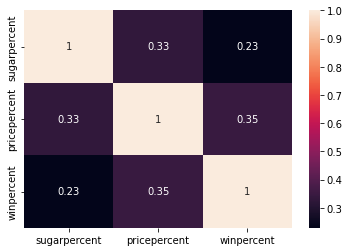

In [54]:
sns.heatmap(data=df.loc[:, ['sugarpercent', 'pricepercent', 'winpercent']].corr(), 
            annot=True);

### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимой – `sugarpercent`. 

Укажите, верно ли следующее утверждение: на уровне значимости 0.05 процент сахара в конфете статистически значимо влияет на рейтинг конфеты.

In [94]:
X, y = df[['sugarpercent', 'winpercent']].values.T

m = sm.OLS(y, sm.add_constant(X))
res = m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.600
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0349
Time:                        23:11:06   Log-Likelihood:                -346.36
No. Observations:                  85   AIC:                             696.7
Df Residuals:                      83   BIC:                             701.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6094      3.086     14.455      0.000      38.471      50.748
x1            11.9239      5.560      2.145      0.035       0.866      22.982
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.845
Skew:                           0.379   Prob(JB):                        0.241
Kurtosis:                       2.523   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимой – `sugarpercent`. 
Чему равно значение оценки коэффициента нашей независимой переменной? Выберите один верный ответ.

In [101]:
res = st.linregress(X, y)
res.slope.round(5)

11.92386

### Постройте линейную модель, где зависимой переменной выступает `winpercent, а независимой – sugarpercent`. 
Чему будет равно значение оценки коэффициента детерминации в данной модели? Выберите один верный ответ.

In [103]:
res = st.linregress(X, y)
res.rvalue ** 2

0.052510023662197175

### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимыми – `sugarpercent` и `pricepercent`
Чему будет равно значение оценки коэффициента при цене конфеты? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если значение отрицательное, не забудьте указать минус перед числом.

In [129]:
X = df[['sugarpercent', 'pricepercent']].assign(const=1)
y = df['winpercent']

m = sm.OLS(y, X)
res = m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     6.353
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00272
Time:                        23:21:36   Log-Likelihood:                -342.53
No. Observations:                  85   AIC:                             691.1
Df Residuals:                      82   BIC:                             698.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sugarpercent     6.7311      5.664      1.188      0.238      -4.536      17.998
pricepercent    15.5865      5.605      2.781      0.007       4.436      26.737
const           39.7867      3.438     11.574      0.000      32.948      46.625
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.467
Skew:                           0.180   Prob(JB):                        0.792
Kurtosis:                       2.946   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимыми – `sugarpercent` и `pricepercent`. 
Чему будет равно значение оценки коэффициента при проценте сахара в конфете? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если значение отрицательное, не забудьте указать минус перед числом.

### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимыми – `sugarpercent` и `pricepercent`. 

Укажите, верно ли следующее утверждение: на уровне значимости 0.05 процент сахара в конфете статистически значимо влияет на рейтинг конфеты.




### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимыми – `sugarpercent` и `pricepercent`. 

Чему будет равно оцененное значение зависимой переменной, когда значение объясняющих переменных равно нулю. Введите ответ в виде в виде десятичной дроби, округлите до двух знаков после запятой; если значение отрицательное, не забудьте указать минус перед числом.

### Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимыми – `sugarpercent` и `pricepercent`. 

Чему будет равен коэффициент детерминации в данной модели? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если коэффициент отрицательный, не забудьте указать минус перед числом.
